https://qiita.com/g-k/items/120f1cf85ff2ceae4aba

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

/home/gakubu/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-18 14:28:52.787778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 14:28:52.787805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 14:28:52.788412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 14:28:52.792192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is opti

In [3]:
dataset = load_digits()
X = dataset.data
y = dataset.target
print(X)
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
print(X_scal)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


PCA

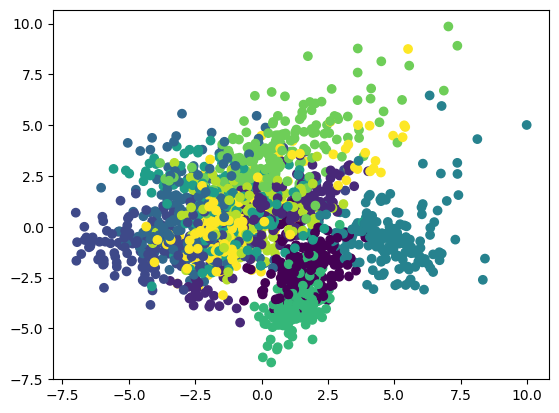

In [4]:
pca = PCA(n_components=2)
embedded_pca = pca.fit_transform(X_scal)
df_pca = pd.DataFrame(embedded_pca, columns=["col1", "col2"])
df_pca["target"] = dataset.target
plt.scatter(df_pca["col1"], df_pca["col2"], c=df_pca["target"])

TSNE

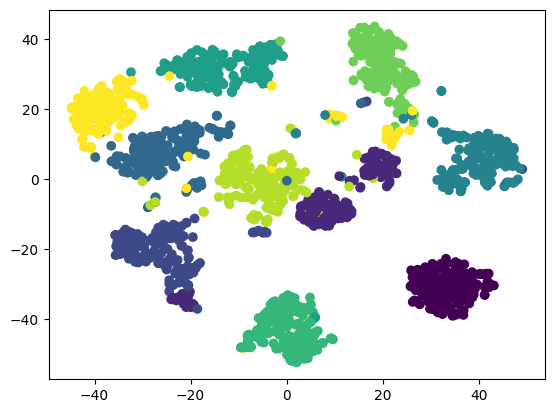

In [5]:
tsne = TSNE(n_components=2, random_state=42)
embedded_tsne = tsne.fit_transform(X_scal)

df_tsne = pd.DataFrame(embedded_tsne, columns = ["col1", "col2"])

df_tsne["target"] = dataset.target

plt.scatter(df_tsne["col1"], df_tsne["col2"], c=df_tsne["target"])

UMAP

/home/gakubu/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


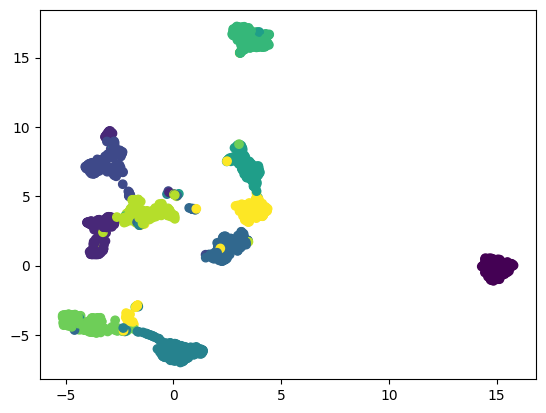

In [6]:
umap = umap.UMAP(random_state=42)
embedded_umap = umap.fit_transform(X_scal)

df_umap = pd.DataFrame(embedded_umap, columns = ["col1", "col2"])
df_umap["target"] = dataset.target

plt.scatter(df_umap["col1"], df_umap["col2"], c = df_umap["target"])